# Técnicas de suavizado

## SMA
Simple Moving Average : Promedio móvil simple
$SMA=\frac{x_1+x_2+...+x_n}{n} $

donde $x_i$ son los valores de la variable, por tanto $SMA$ es un promedio aritmético de $n$ períodos atrás.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/LocalTime_2015.csv', index_col=0, parse_dates=True)

In [3]:
df = pd.DataFrame()

Se obtienen los datos entre las horas de más información.

In [4]:
df['RSG'] = df2015['SRGLOAVG1H'].between_time('08:00:00','17:00:00')

### Ejemplo simple

Se utiliza una ventana de dos horas.

In [17]:
df['SMA2'] = df['RSG'].rolling(window=2).mean()

El primer valor es nulo porque se necesitan dos horas para obtener el promedio.

In [18]:
df

,RSG,SMA2
Local_Time,,
2015-01-01 08:00:00,107.0,NaN
2015-01-01 09:00:00,394.0,250.5
2015-01-01 10:00:00,728.0,561.0
2015-01-01 11:00:00,428.0,578.0
2015-01-01 12:00:00,403.0,415.5
...,...,...
2015-12-31 13:00:00,501.0,531.5
2015-12-31 14:00:00,472.0,486.5
2015-12-31 15:00:00,396.0,434.0


Hay que considerar que se utilizan valores del día anterior.

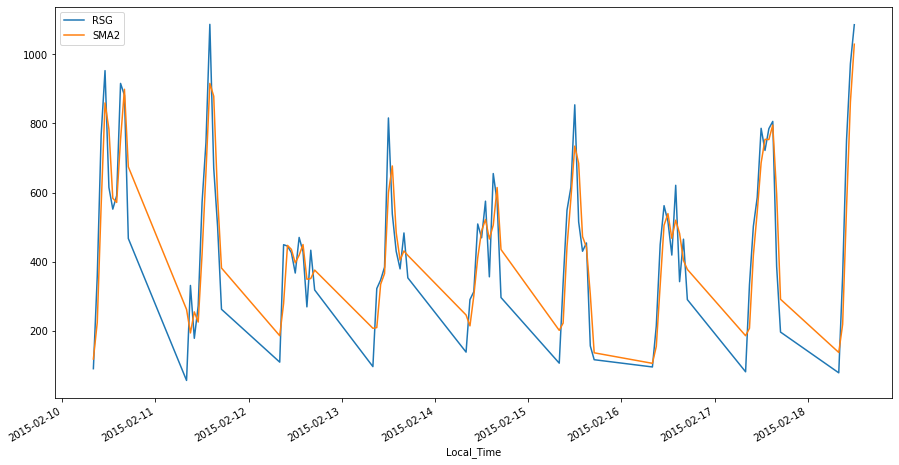

In [19]:
df[:]['2015-02-10 7:00:00':'2015-02-18 12:00:00'].plot(figsize=(15,8));

## EWMA
Exponentially Weighted Moving Average: Promedio móvil ponderado exponencialmente
EWMA, pondrá más peso en los valores que ocurrieron más recientemente. La cantidad de peso aplicada a los valores más recientes dependerá de los parámetros utilizados en EWMA.

La fórmula con la que se calculan las estimaciones es:

$y_t = \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Donde $x_t$ son los valores de la variable, $w_i$ son los pesos (desde $i=0$ hasta $t$), y la $y_t$ es la estimación resultante.

### Ejemplo simple

4 horas

In [20]:
df['EWMA4'] = df['RSG'].ewm(span=4,adjust=False).mean()

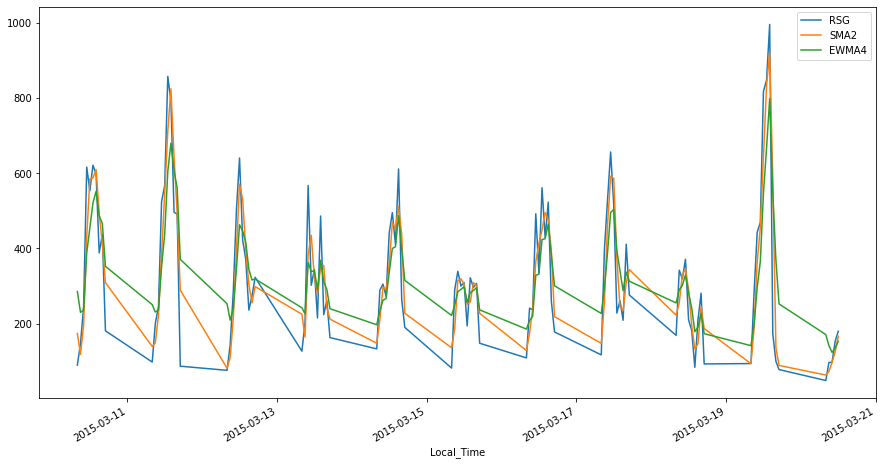

In [22]:
df['2015-03-10 7:00:00':'2015-03-20 12:00:00'].plot(figsize=(15,8));

Estas técnicas de suavizado se utilizarán en futuros cuadernos para observar el resultado de las predicciones de los modelos.